## Building a Web News Article Clustering System(Latent Semantic Association)
#### Perform topic modelling on the dataset using PLSA.

#### Output/explain the following steps in the code:
#### a) The vocabulary of words used.
#### b) Words document Co-occurrence matrix
#### c) Words under each topic and the score
#### For the given dataset, use the first 100,000 headlines and 20 topics.

In [1]:
pip install plsa

     |████████████████████████████████| 220 kB 266 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158513 sha256=ccf8403e9e047d5a945ad8cb33b3a03471bc42d4ac1c12367ec52eb596af74dd
  Stored in directory: /Users/harshavenna/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [2]:
# python libraries for data manipulation and math
import os
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
# python library for probabilistic latent semantic analysis

from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
import plsa

In [7]:
data = pd.read_csv("india-news-headlines.csv",nrows=1000, usecols=["headline_text"])
data

headline_text
0    win over cena satisfying but defeating underta...
1    Status quo will not be disturbed at Ayodhya; s...
2                  Fissures in Hurriyat over Pak visit
3                America's unwanted heading for India?
4                   For bigwigs; it is destination Goa
..                                                 ...
995         Tigers refuse to sign Norwegian peace deal
996                Fiji Hindus protest religious curbs
997    Students back home safe after trauma in Gujarat
998               No aftershock here: Bangalorean safe
999  State sends para-medical staff to quake-hit areas

[1000 rows x 1 columns]

In [8]:
# the total vocabulary of the 1000 rows of data is calculated
vocabulary = []
for sentence in data["headline_text"].values:
    lis_words = word_tokenize(sentence)
    vocabulary.extend(lis_words)

In [9]:
total_vocabulary = set(vocabulary)
len(total_vocabulary)

2610

In [10]:
# defining the set of processes to clean the text
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [12]:
# reading data again using plsa module
csv_file = "india-news-headlines.csv"
corpus = Corpus.from_csv(csv_file, pipeline,col=2,max_docs=1000)
corpus # corpus object 

Corpus:
Number of documents: 983
Number of words:     1374

In [13]:
processed_vocabulary = corpus.vocabulary
#processed_vocabulary

In [14]:
corpus.n_words

1374

### Result_1

In [100]:
print(f"the total number of words without any cleaning or preprocessing (total vocabulary) are : {len(total_vocabulary)}")
print(f"the total number of words with cleaning or preprocessing (processed vocabulary) are : {corpus.n_words}")

the total number of words without any cleaning or preprocessing (total vocabulary) are : 2610
the total number of words with cleaning or preprocessing (processed vocabulary) are : 1374


## Result_2

### Words document Co-occurrence matrix

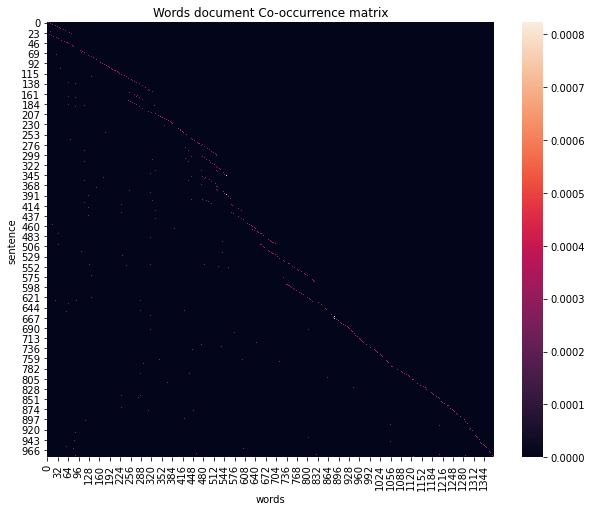

In [135]:
plt.figure(figsize=(10,8))
sns.heatmap(corpus.get_doc_word(tf_idf=True))
plt.xlabel("words")
plt.ylabel("sentence")
plt.title("Words document Co-occurrence matrix")
plt.show()

### Words document Co-occurrence matrix using word cloud

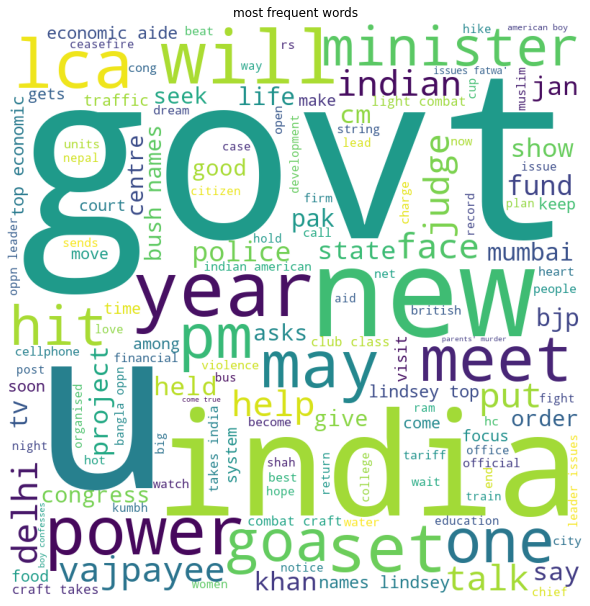

In [118]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data["headline_text"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
    

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("most frequent words")
plt.show() 

## Run PLSA
#### initializing number of topics the number of topics

In [103]:
n_topics = 20

## Instantiate a PLSA model

In [104]:
plsa = PLSA(corpus, n_topics, True)
plsa

PLSA:
====
Number of topics:     20
Number of documents:  983
Number of words:      1374
Number of iterations: 0

In [105]:
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     20
Number of documents:  983
Number of words:      1374
Number of iterations: 60

In [106]:
result = plsa.best_of(5)

### Visualize the Results

In [120]:
visualize = Visualize(result)
visualize

Visualize:
Number of topics:    20
Number of documents: 983
Number of words:     1374

## Convergence

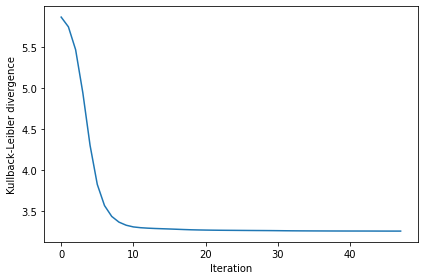

In [123]:
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

## Relative topic importance

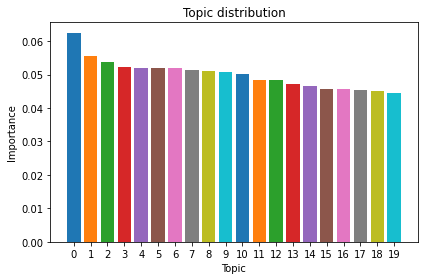

In [124]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

## The topics

## Result_3

## Words under each topic and the score

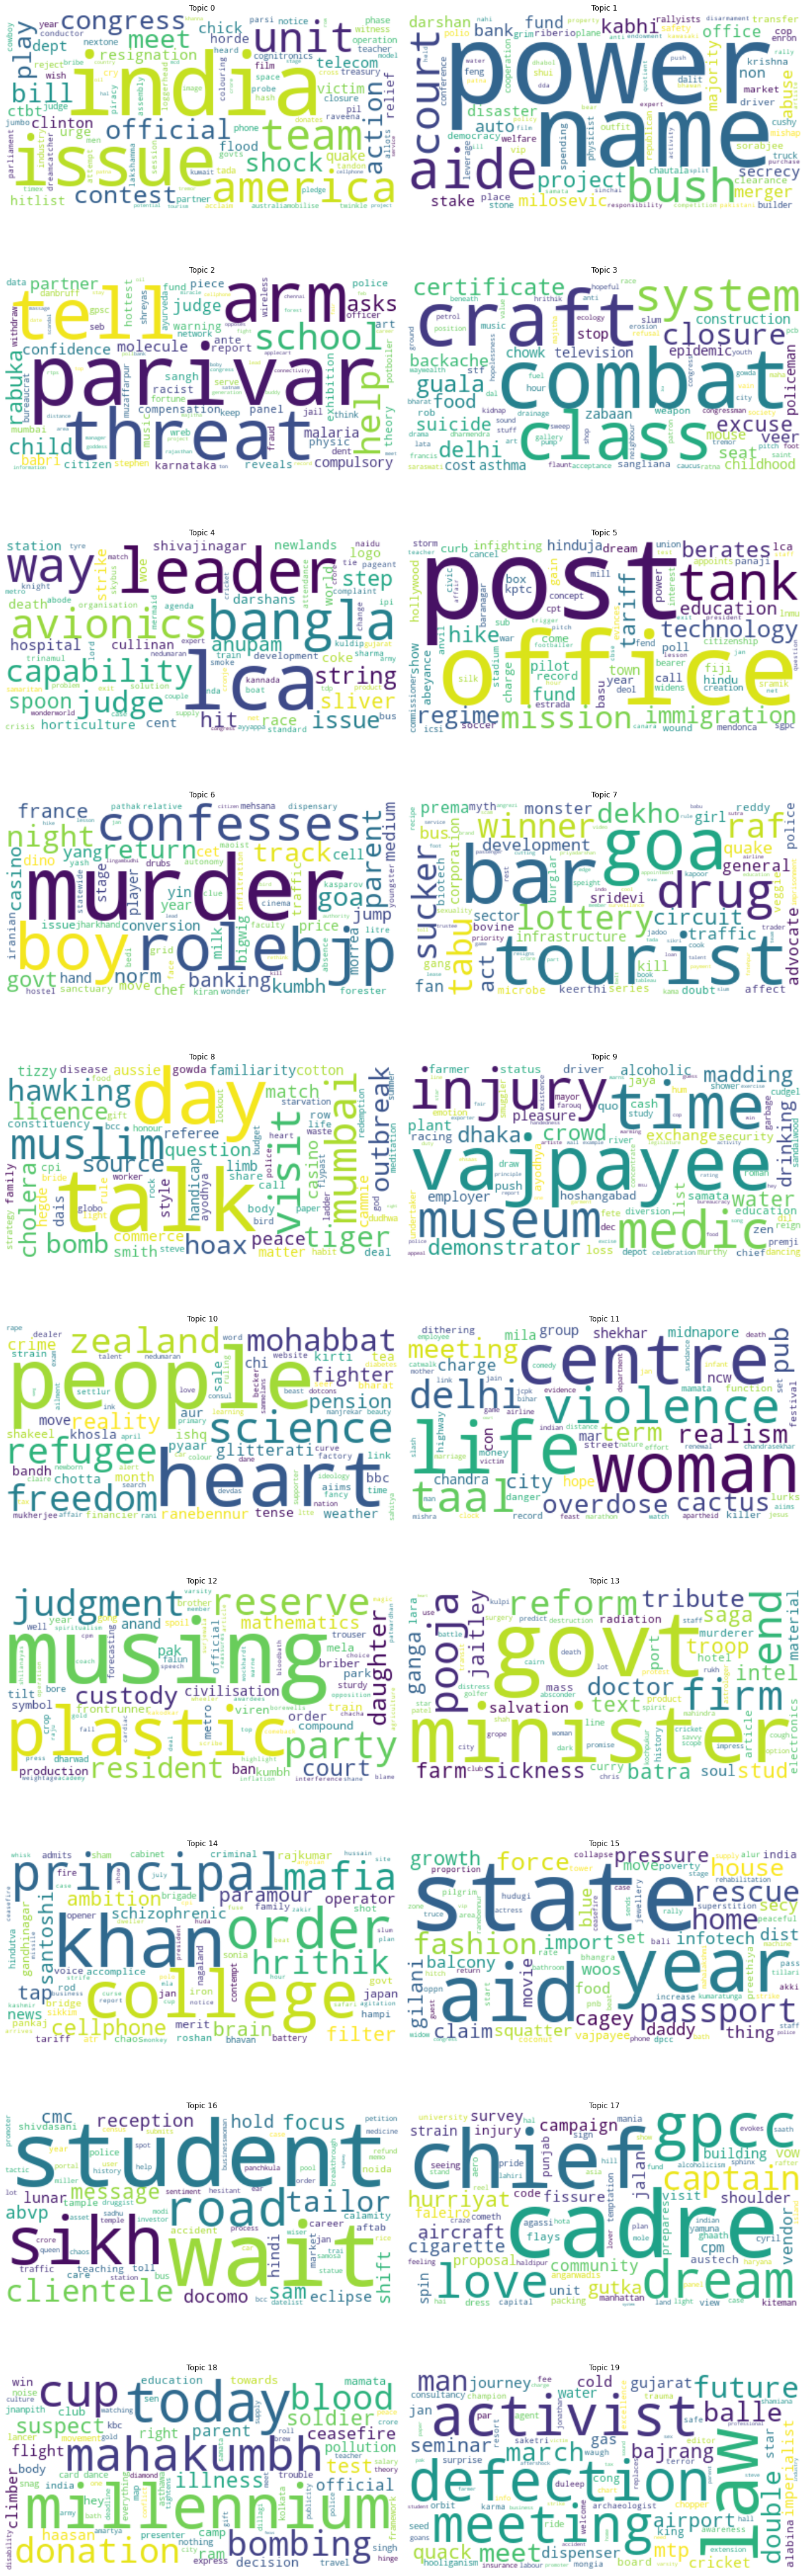

In [140]:
fig = plt.figure(figsize=(18, 60))
_ = visualize.wordclouds(fig)
fig.tight_layout()